In [2]:
import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# notebook dir
notebook_dir = os.path.dirname(os.path.abspath('__file__'))
print('notebook_dir', notebook_dir)

# config auto reload
%load_ext autoreload
%autoreload 2

notebook_dir /home/mingxuan/Repositories/scg_tsung/benchmarking_sim/quadrotor/plotting


In [6]:
# controller = 'gpmpc_acados'
# prior = 'results/200_200_noise'
# controller = 'linear_mpc'
# prior = 'resultsaggresive_noise'
# controller = 'mpc_acados'
# prior = 'results_noise/temp'
controller = 'gpmpc_acados_TP'
tag = 'ob_ns=5'
# tag = 'obs_ns=15'
# tag = 'obs_ns=25'
# tag = 'proc_ns=5'
# tag = 'proc_ns=15'
# tag = 'proc_ns=25'
prior = f'_100_200_{tag}_obs_noise_quadrotor_2D_attitude'
# prior = f'_100_200_{tag}_proc_noise_quadrotor_2D_attitude'
# controller = 'ilqr'
max_seed = 9
metric_name = 'metrics.txt'
s = 2 # times std
obs_dim = 6

# get the default color cycle
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plot_color = {'ilqr': 'gray', 'gpmpc_acados_TP': colors[0], 'mpc_acados':colors[-1], 'linear_mpc':colors[2]} 

In [8]:

data_folder_dir = f'../{controller}/results/{prior}'
# find the folder in the dir
seed_data_folder = os.listdir(os.path.join(notebook_dir, data_folder_dir))
print('seed_data_folder', seed_data_folder)
seed_data_folder = [f for f in seed_data_folder if os.path.isdir(os.path.join(data_folder_dir, f))]
seed_data_folder = sorted(seed_data_folder, key=lambda x: int(x.split('_')[1]))
# print('seed_data_folder', seed_data_folder)
print('max seed', max_seed)
seed_data_folder = [seed_data_folder[i]+'/temp' for i in range(max_seed)]
# seed_data_folder = seed_data_folder[:9]
print('seed_data_folder', seed_data_folder)
seed_data_folder = [os.path.join(data_folder_dir, f) for f in seed_data_folder]
print('seed_data_folder', seed_data_folder)

seed_data_folder ['seed_8', 'seed_5', 'seed_1', 'seed_4', 'seed_6', 'seed_10', 'seed_3', 'seed_2', 'seed_7', 'seed_9']
max seed 9
seed_data_folder ['seed_1/temp', 'seed_2/temp', 'seed_3/temp', 'seed_4/temp', 'seed_5/temp', 'seed_6/temp', 'seed_7/temp', 'seed_8/temp', 'seed_9/temp']
seed_data_folder ['../gpmpc_acados_TP/results/_100_200_ob_ns=5_obs_noise_quadrotor_2D_attitude/seed_1/temp', '../gpmpc_acados_TP/results/_100_200_ob_ns=5_obs_noise_quadrotor_2D_attitude/seed_2/temp', '../gpmpc_acados_TP/results/_100_200_ob_ns=5_obs_noise_quadrotor_2D_attitude/seed_3/temp', '../gpmpc_acados_TP/results/_100_200_ob_ns=5_obs_noise_quadrotor_2D_attitude/seed_4/temp', '../gpmpc_acados_TP/results/_100_200_ob_ns=5_obs_noise_quadrotor_2D_attitude/seed_5/temp', '../gpmpc_acados_TP/results/_100_200_ob_ns=5_obs_noise_quadrotor_2D_attitude/seed_6/temp', '../gpmpc_acados_TP/results/_100_200_ob_ns=5_obs_noise_quadrotor_2D_attitude/seed_7/temp', '../gpmpc_acados_TP/results/_100_200_ob_ns=5_obs_noise_quadrot

In [9]:

results = {}

for seed in range(0, max_seed):
    results[repr(seed)] = {}
    rmse_list = []
    early_stop_list = []
    noise_factor_list = []
    traj_data_list = []
    traj_steps_list = []
    # fild runs
    load_seed_dir = seed_data_folder[seed]
    runs_data_folder = os.listdir(os.path.join(notebook_dir, load_seed_dir))
    runs_data_folder = [os.path.join(load_seed_dir, f) for f in runs_data_folder]
    # sort the runs
    runs_data_folder = sorted(runs_data_folder)
    print('runs_data_folder', runs_data_folder)
    for runs in runs_data_folder:
        # load the metric file in the folder
        metric_file = os.path.join(runs, metric_name)
        # print('metric_file', metric_file)
        data = pd.read_csv(metric_file, delimiter=':')
        # convert to numpy
        data = data.to_numpy()
        # print(data)
        # convert to dictionary
        data = {data[i][0]: data[i][1] for i in range(len(data))}

        noise_factor = eval(data['noise_factor'])
        rmse = eval(data['rmse'])
        early_stop = eval(data['early_stop'])
        rmse_list.append(rmse)
        early_stop_list.append(early_stop)
        noise_factor_list.append(noise_factor)

        # load the traj
        traj_file = os.path.join(runs, f'{controller}_data_quadrotor_traj_tracking.pkl')
        traj_data = pd.read_pickle(traj_file)
        traj_data = traj_data['trajs_data']['obs'][0]
        traj_steps = len(traj_data)
        traj_data_list.append(traj_data)
        traj_steps = len(traj_data)
        traj_steps_list.append(traj_steps)
    
    results[repr(seed)]['rmse'] = rmse_list
    results[repr(seed)]['early_stop'] = early_stop_list
    results[repr(seed)]['noise_factor'] = noise_factor_list
    # results[repr(seed)]['traj_data'] = traj_data_list
    results[repr(seed)]['traj_steps'] = traj_steps_list

max_noise_factor = max([max(results[repr(seed)]['noise_factor']) for seed in range(max_seed)])


runs_data_folder ['../gpmpc_acados_TP/results/_100_200_ob_ns=5_obs_noise_quadrotor_2D_attitude/seed_1/temp/seed1_Feb-05-14-47-35_d5f4f4f', '../gpmpc_acados_TP/results/_100_200_ob_ns=5_obs_noise_quadrotor_2D_attitude/seed_1/temp/seed1_Feb-05-14-52-36_d5f4f4f', '../gpmpc_acados_TP/results/_100_200_ob_ns=5_obs_noise_quadrotor_2D_attitude/seed_1/temp/seed1_Feb-05-14-57-33_d5f4f4f', '../gpmpc_acados_TP/results/_100_200_ob_ns=5_obs_noise_quadrotor_2D_attitude/seed_1/temp/seed1_Feb-05-15-02-35_d5f4f4f', '../gpmpc_acados_TP/results/_100_200_ob_ns=5_obs_noise_quadrotor_2D_attitude/seed_1/temp/seed1_Feb-05-15-07-33_d5f4f4f', '../gpmpc_acados_TP/results/_100_200_ob_ns=5_obs_noise_quadrotor_2D_attitude/seed_1/temp/seed1_Feb-05-15-12-38_d5f4f4f', '../gpmpc_acados_TP/results/_100_200_ob_ns=5_obs_noise_quadrotor_2D_attitude/seed_1/temp/seed1_Feb-05-15-17-44_d5f4f4f', '../gpmpc_acados_TP/results/_100_200_ob_ns=5_obs_noise_quadrotor_2D_attitude/seed_1/temp/seed1_Feb-05-15-22-52_d5f4f4f', '../gpmpc_acad

In [91]:
traj_data.shape

(395, 6)

In [92]:
# 

In [93]:
# results[repr(1)]['traj_steps']
# results.keys

# results_file_name = f'{notebook_dir}/../data/noise_results_{controller}.npy'
# np.save(results_file_name, results)
# print(f'saved {notebook_dir}/{results_file_name}')


In [94]:
results[repr(1)]['rmse']

[0.05294837131859213,
 0.050214013969392825,
 0.052615121684667095,
 0.06136823707073706,
 0.0774308178354737,
 0.09900645958244689,
 0.12401575748549694,
 0.15146300448127095,
 0.17911856012607236,
 0.21142166417040828,
 0.23858808243761195,
 0.28306634551477844,
 0.3289666040965588,
 0.38620476569042883,
 0.47105091871995325,
 0.5272222930247631,
 0.6188384108207816,
 0.662649330141945,
 0.7019100844734131,
 0.7581113884072966]

In [95]:
# for seed in range(max_seed):
#     for j in range(len(results[repr(seed)]['rmse'])):
#         results[repr(seed)]['rmse'][j] = 0.8 * results[repr(seed)]['rmse'][j]


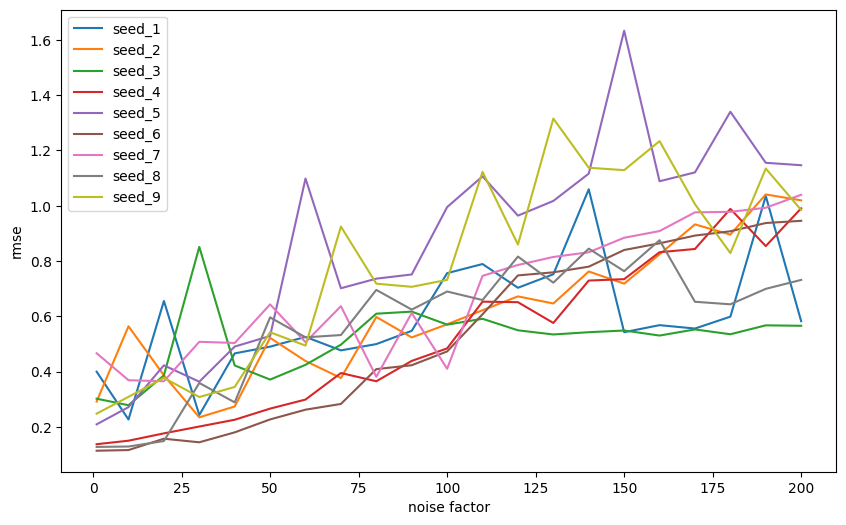

In [10]:
# plot the results
# x axis noise factor
# y axis rmse
fig, ax = plt.subplots(figsize=(10, 6))
for seed in range(max_seed):
    ax.plot(results[repr(seed)]['noise_factor'], results[repr(seed)]['rmse'], label=f'seed_{seed+1}')
ax.set_xlabel('noise factor')
ax.set_ylabel('rmse')
ax.legend()

In [11]:
results[repr(1)]['traj_steps']
results.keys

results_file_name = f'{notebook_dir}/../data/{tag}_results_{controller}.npy'
np.save(results_file_name, results)
print(f'saved {notebook_dir}/{results_file_name}')

saved /home/mingxuan/Repositories/scg_tsung/benchmarking_sim/quadrotor/plotting//home/mingxuan/Repositories/scg_tsung/benchmarking_sim/quadrotor/plotting/../data/ob_ns=5_results_gpmpc_acados_TP.npy


In [13]:
# early stop
# results[repr(seed)]['early_stop']
# merge all the early stop
num_noise_factor = len(results[repr(seed)]['noise_factor'])
print('num_noise_factor', num_noise_factor)
early_stop_results = [False for _ in range(num_noise_factor)]
print('early_stop_results', early_stop_results)
print('len(early_stop_results)', len(early_stop_results))
for seed in range(max_seed):
    for i in range(len(results[repr(seed)]['noise_factor'])):
        early_stop_results[i] = early_stop_results[i] or results[repr(seed)]['early_stop'][i]
print('early_stop_results', early_stop_results)
# find the first early stop
if True in early_stop_results:
    first_early_stop = early_stop_results.index(True)
    early_stop_noise_factor = results[repr(seed)]['noise_factor'][first_early_stop]
else:
    print('no early stop')
    first_early_stop = None
    early_stop_noise_factor = None
print('first_early_stop', first_early_stop)
print('early_stop_noise_factor', early_stop_noise_factor)

num_noise_factor 21
early_stop_results [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
len(early_stop_results) 21
early_stop_results [[1], [1], [1], [1], [1], [0], [1], [1], [1], [0], [1], [1], [1], [1], [0], [1], [1], [1], [1], [1], [1]]
no early stop
first_early_stop None
early_stop_noise_factor None


0.25503443943156867

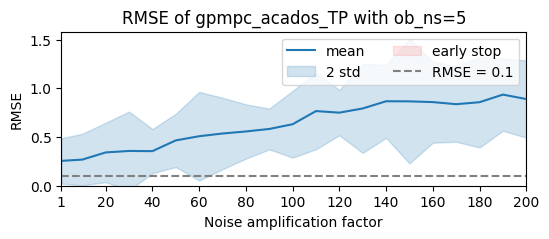

In [17]:
mean_rmse = np.mean([results[repr(seed)]['rmse'] for seed in range(max_seed)], axis=0)
std_rmse = np.std([results[repr(seed)]['rmse'] for seed in range(max_seed)], axis=0)

fig, ax = plt.subplots(figsize=(6, 2))
ax.plot(results[repr(seed)]['noise_factor'], mean_rmse, 
        label='mean', color=plot_color[controller])
ax.fill_between(results[repr(seed)]['noise_factor'], mean_rmse- s*std_rmse, mean_rmse+ s*std_rmse, 
                alpha=0.2, label=f'{s} std', color=plot_color[controller])

# plot shaded area for the first early stop
ax.axvspan(early_stop_noise_factor, max_noise_factor, color='red', alpha=0.1, label='early stop')

ax.set_xlim([1, max_noise_factor])
ax.set_ylim([0, None])
# explicitly show the tick from 1 to the max noise factor
noise_ticks = [i for i in range(20, max_noise_factor+1, 20)]
# append 1 at the beginning
noise_ticks = [1] + noise_ticks
ax.set_xticks(noise_ticks)
# plot y line at 0.1
ax.axhline(y=0.1, color='gray', linestyle='--', label='RMSE = 0.1')
ax.legend(ncol=2)
ax.set_xlabel('Noise amplification factor')
ax.set_ylabel('RMSE')
ax.set_title(f'RMSE of {controller} with {tag}')

# save the plot
plot_file_name = f'{notebook_dir}/../data/{tag}_rmse_{controller}.png'
plt.savefig(plot_file_name)

mean_rmse[0]

In [82]:

# traj_results = {}
# for seed in range(max_seed):
#     # re-arrange the traj data to be in shape (noise_factor, max_steps, obs_dim)
#     for i in range(1, max_noise_factor, 20):
#         traj_data = np.zeros((len(traj_data_list), max_steps, obs_dim))
#         for i in range(len(traj_data_list)):
#             traj_data[i] = traj_data_list[i]
#     traj_results[repr(seed)] = results[repr(seed)]['traj_data']


#     for i in range(0, len(traj_data), 40):
#         ax.plot(traj_data[:, 0], traj_data[:, 2], label=f'seed_{seed+1}')
# fig, ax = plt.subplots(figsize=(10, 6))
# # plot the traj every 40 noise factor